 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "") #Remove the $ sign symbol

sp500_df["Close"] = sp500_df["Close"].astype("float") #Change data type

/var/folders/xc/gr8gg1v93g7dlwc084h46r3w0000gn/T/ipykernel_3428/3849879692.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", "") #Remove the $ sign symbol


In [11]:
#Check Data Types Again
sp500_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
#Convert closing prices to daily returns
sp500_df = (sp500_df - sp500_df.shift(1)) / sp500_df.shift(1)
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_df = sp500_df.dropna().copy()
sp500_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={"Close": "S&P 500"})
sp500_df

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

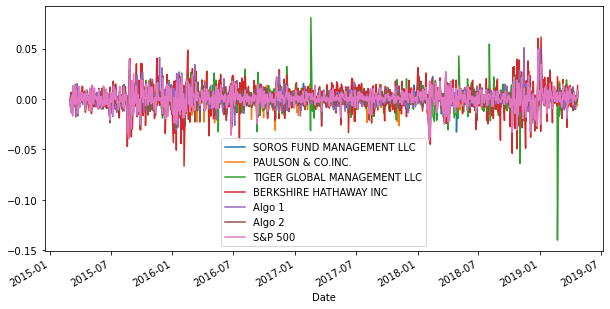

In [16]:
# Plot daily returns of all portfolios

"""Daily returns already calculated."""

combined_df.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

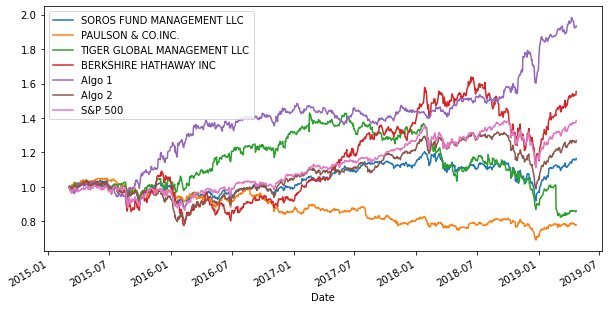

In [17]:
# Calculate cumulative returns of all portfolios
combined_cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns
combined_cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

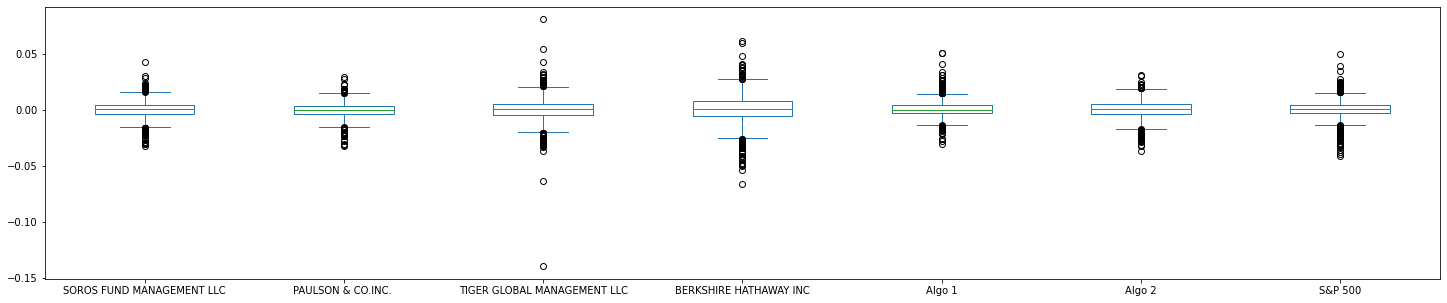

In [19]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(25,5))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
combined_daily_std = combined_df.std()
combined_daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_df.std()
print(sp500_daily_std)
print("\n")

#Sort highest risk portfolios descending
combined_daily_std_risk = combined_daily_std.sort_values(ascending=False)
combined_daily_std_risk

S&P 500    0.008111
dtype: float64




BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
combined_annualized_std = combined_daily_std * np.sqrt(252)
combined_annualized_std


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

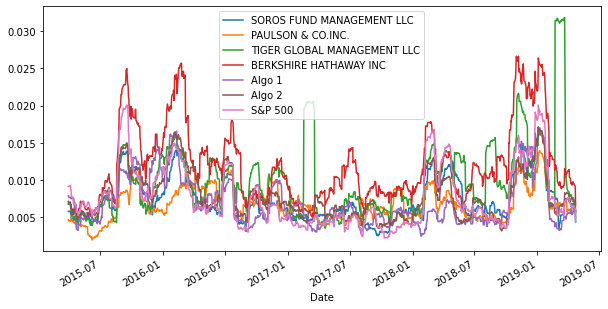

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_combined = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_combined.plot(figsize=(10,5))

### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P 500                                       0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2         

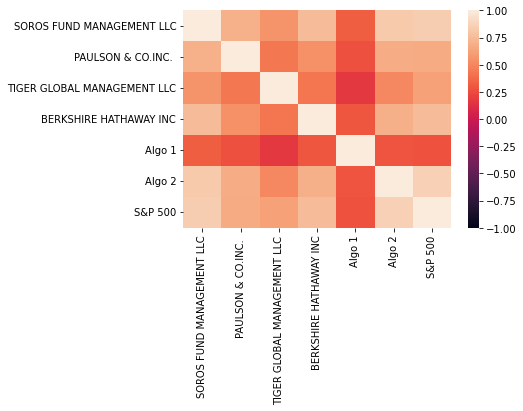

In [23]:
# Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)
print(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

5.658503197203613e-05
7.31663242464871e-05
0.7733753547794622


<AxesSubplot:title={'center':'Rolling 60-Day Covariance of SOROS Returns vs. S&P 500 Returns'}, xlabel='Date'>

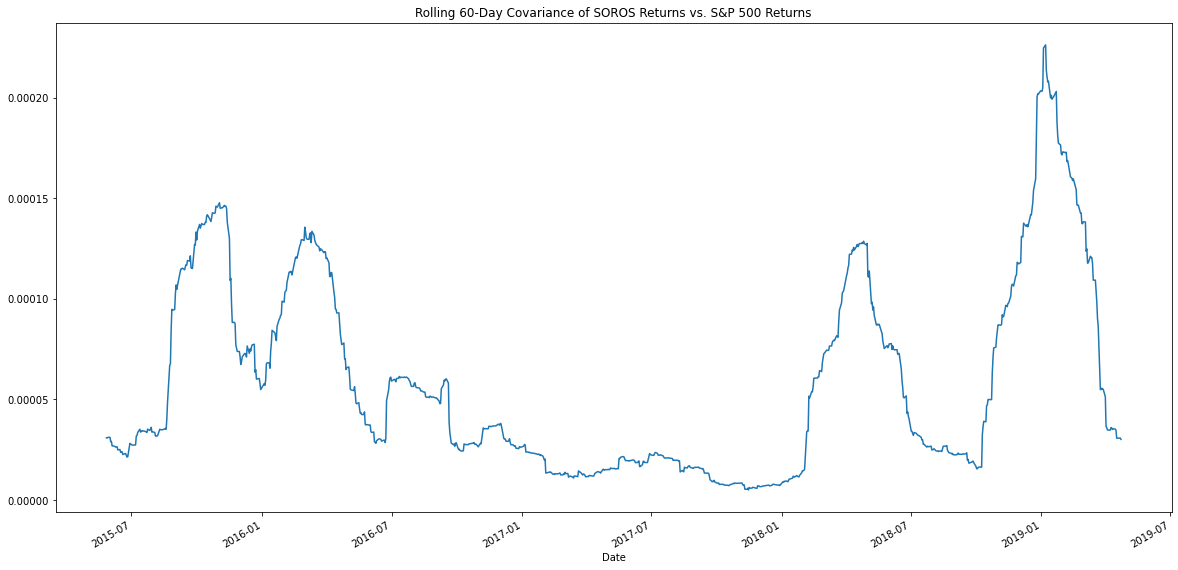

In [23]:
# Calculate covariance of a single portfolio
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['S&P 500'])
print(covariance)

# Calculate variance of S&P 500
variance = combined_df['S&P 500'].var()
print(variance)

# Computing beta
soros_beta = covariance / variance
print(soros_beta)

# Plot beta trend
rolling_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of SOROS Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window

combined_df.ewm(halflife=21).std()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratio = combined_df.mean() / combined_df.std()
annualized_sharpe_ratio = np.sqrt(252) * sharpe_ratio
annualized_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

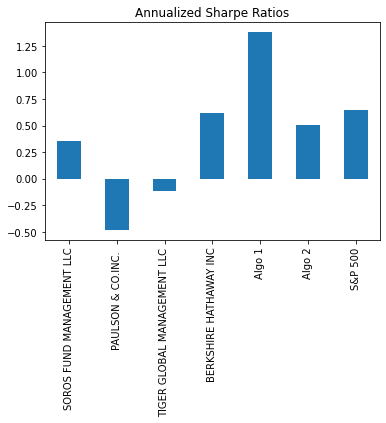

In [26]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot(kind="bar", title="Annualized Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Yes, the algorithmic stratgies definetly outperformed both portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
apple_data = Path("Resources/1_Apple Stock.csv")
apple_df = pd.read_csv(apple_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
apple_df.sort_index()
apple_df.head()

,Close
Date,
2019-01-02 16:00:00,39.48
2019-01-03 16:00:00,35.55
2019-01-04 16:00:00,37.07
2019-01-07 16:00:00,36.98
2019-01-08 16:00:00,37.69


In [28]:
# Reading data from 2nd stock
tesla_data = Path("Resources/2_Tesla Stock.csv")
tesla_df = pd.read_csv(tesla_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
tesla_df.sort_index()
tesla_df.head()

,Close
Date,
2019-01-02 16:00:00,62.02
2019-01-03 16:00:00,60.07
2019-01-04 16:00:00,63.54
2019-01-07 16:00:00,66.99
2019-01-08 16:00:00,67.07


In [29]:
# Reading data from 3rd stock
twitter_data = Path("Resources/3_Twitter Stock.csv")
twitter_df = pd.read_csv(twitter_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
twitter_df.sort_index()
twitter_df.head()

,Close
Date,
2019-01-02 16:00:00,28.81
2019-01-03 16:00:00,27.99
2019-01-04 16:00:00,29.95
2019-01-07 16:00:00,31.34
2019-01-08 16:00:00,31.80


In [30]:
# Combine all stocks in a single DataFrame
new_combined_df = pd.concat([apple_df, tesla_df, twitter_df], axis="columns", join="inner")
new_combined_df.head()

,Close,Close,Close
Date,,,
2019-01-02 16:00:00,39.48,62.02,28.81
2019-01-03 16:00:00,35.55,60.07,27.99
2019-01-04 16:00:00,37.07,63.54,29.95
2019-01-07 16:00:00,36.98,66.99,31.34
2019-01-08 16:00:00,37.69,67.07,31.80


In [31]:
# Reset Date index
new_combined_df.index = new_combined_df.index.date # Removed time from date.

In [33]:
# Reorganize portfolio data by having a column per symbol
new_combined_df.columns = ['APPL', 'TSLA', 'TWTR'] #Label Columns
new_combined_df.head()

,APPL,TSLA,TWTR
2019-01-02,39.48,62.02,28.81
2019-01-03,35.55,60.07,27.99
2019-01-04,37.07,63.54,29.95
2019-01-07,36.98,66.99,31.34
2019-01-08,37.69,67.07,31.80


In [34]:
# Calculate daily returns
daily_returns_new_combined_df = (new_combined_df - new_combined_df.shift(1)) / new_combined_df.shift(1)

# Drop NAs
daily_returns_new_combined_df = daily_returns_new_combined_df.dropna()

# Display sample data
daily_returns_new_combined_df.head()

,APPL,TSLA,TWTR
2019-01-03,-0.099544,-0.031441,-0.028462
2019-01-04,0.042757,0.057766,0.070025
2019-01-07,-0.002428,0.054297,0.046411
2019-01-08,0.019200,0.001194,0.014678
2019-01-09,0.016981,0.009542,0.014151


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns_new_combined_df.dot(weights)

# Display sample data
portfolio_returns.head()

2019-01-03   -0.053149
2019-01-04    0.056849
2019-01-07    0.032760
2019-01-08    0.011691
2019-01-09    0.013558
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
all_combined_df = pd.concat([portfolio_returns, combined_df], axis="columns", join="inner")
all_combined_df = all_combined_df.rename(columns={0: "Kyle"})
all_combined_df

/Users/kyleplathe/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:347: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,Kyle,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2019-01-03,-0.053149,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757
2019-01-04,0.056849,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336
2019-01-07,0.032760,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010
2019-01-08,0.011691,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695
2019-01-09,0.013558,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.004098
...,...,...,...,...,...,...,...,...
2019-04-16,0.006295,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.004124,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.002932,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.011859,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [53]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_combined_df = all_combined_df.dropna()
all_combined_df.head()

,Kyle,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2019-01-04,-2.575682,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336
2019-01-07,-0.484690,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010
2019-01-08,-3.523279,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695
2019-01-09,2.279665,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.004098
2019-01-10,0.335362,0.002869,-0.000388,0.007423,0.003163,0.003087,0.003366,0.004518


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [54]:
# Calculate the annualized `std`
annualized_all_combined_std = all_combined_df * np.sqrt(252)
annualized_all_combined_std.head()

,Kyle,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2019-01-04,-40.887690,0.474353,0.429114,0.532754,0.973762,0.279739,0.484318,0.545062
2019-01-07,-7.694215,0.143687,0.229776,0.224007,0.272800,0.234120,0.268952,0.111287
2019-01-08,-55.930319,0.170806,0.127792,0.024507,0.092889,0.171840,0.166349,0.153908
2019-01-09,36.188562,0.136990,-0.012695,-0.008483,0.314122,0.003393,0.153310,0.065054
2019-01-10,5.323703,0.045548,-0.006158,0.117834,0.050210,0.049000,0.053427,0.071728


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

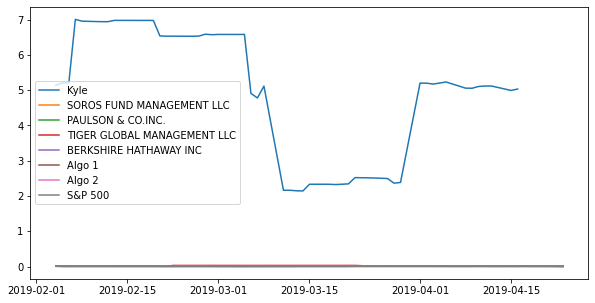

In [55]:
# Calculate rolling standard deviation
all_rolling_combined = all_combined_df.rolling(window=21).std()

# Plot rolling standard deviation
all_rolling_combined.plot(figsize=(10,5))

### Calculate and plot the correlation

<AxesSubplot:>

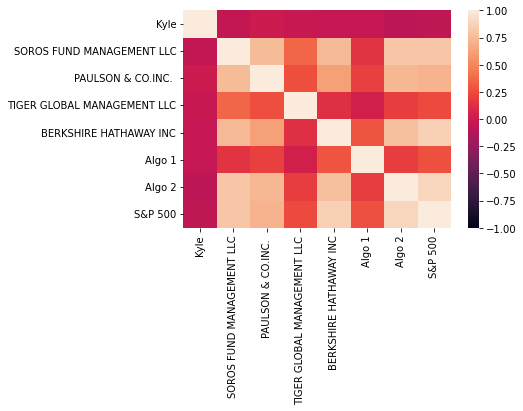

In [56]:
# Calculate and plot the correlation
all_correlation = all_combined_df.corr()

sns.heatmap(all_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

9.701981921770618e-05
6.219278825317189e-05
0.7733753547794622


<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Kyle Returns vs. S&P 500 Returns'}>

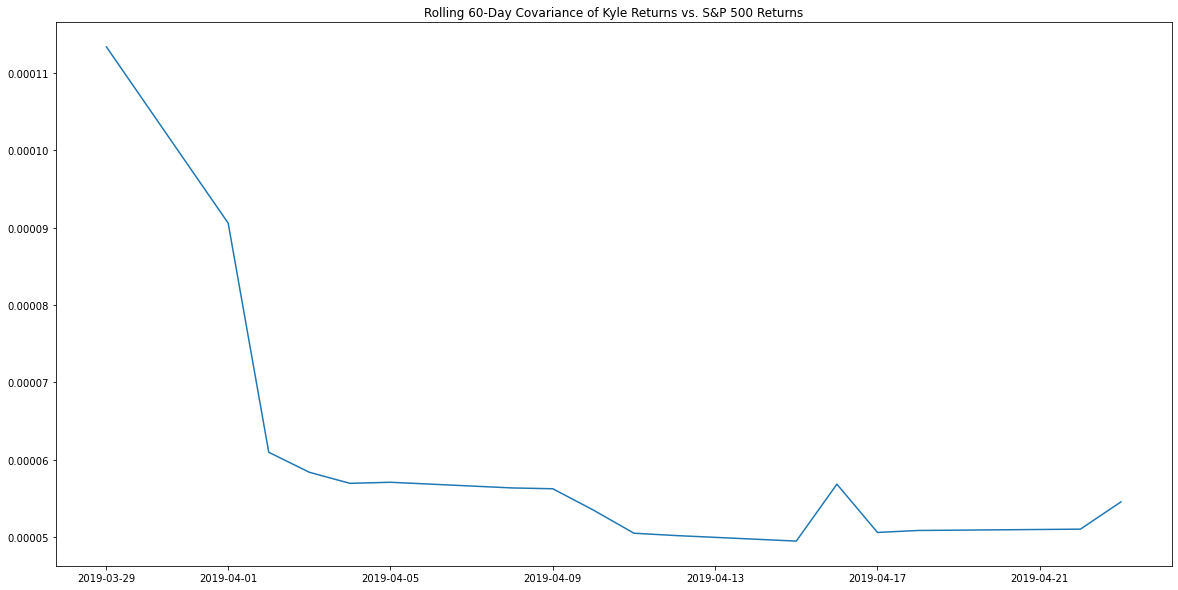

In [43]:
# Calculate and plot Beta
# Calculate covariance of all daily returns of Kyle vs. S&P 500

covariance_2 = all_combined_df['Kyle'].cov(combined_df['S&P 500'])
print(covariance_2)

# Calculate variance of S&P 500
variance_2 = all_combined_df['S&P 500'].var()
print(variance_2)

# Computing beta
kyle_beta = covariance / variance
print(kyle_beta)

# Plot beta trend
rolling_covariance_2 = all_combined_df['Kyle'].rolling(window=60).cov(all_combined_df['S&P 500'])
rolling_covariance_2.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Kyle Returns vs. S&P 500 Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratio = all_combined_df.mean() / all_combined_df.std()
annualized_sharpe_ratio_2 = np.sqrt(252) * all_sharpe_ratio
annualized_sharpe_ratio_2

Kyle                           1.868152
SOROS FUND MANAGEMENT LLC      4.998934
PAULSON & CO.INC.              2.364248
TIGER GLOBAL MANAGEMENT LLC   -0.384135
BERKSHIRE HATHAWAY INC         4.442098
Algo 1                         3.488488
Algo 2                         5.051608
S&P 500                        4.196678
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

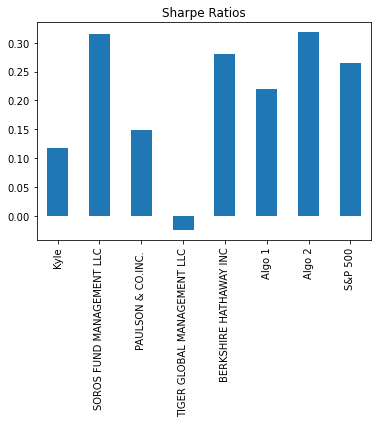

In [46]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [49]:
#My portfolio preforms ok.  It doesnt outpreform the S&P 500.